In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# creat a dataset

df = pd.DataFrame({'water': np.repeat(['daily','weakly'],15),
                    'sun': np.tile(np.repeat(['low','medium','high'], 5), 2),
                    'height': [6,6,6,5,6,5,5,6,4,5,
                            6,6,7,8,7,3,4,4,4,5,
                            4,4,4,4,4,5,6,6,7,8]})
df.sample(10)
# here we have 2 factors and total 5 categorical variables in 2 directions and 1 height continiuous variable. (2 factors we use twoway ANOVA)

,water,sun,height
13,daily,high,8
25,weakly,high,5
21,weakly,medium,4
18,weakly,low,4
19,weakly,low,5
2,daily,low,6
15,weakly,low,3
22,weakly,medium,4
7,daily,medium,6
24,weakly,medium,4


C:\Users\Junaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

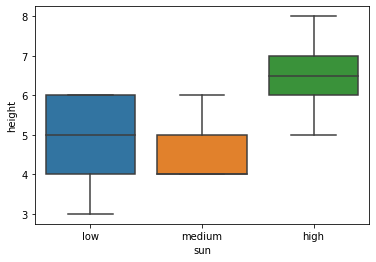

In [12]:
sns.boxplot(df['sun'],df['height'])

C:\Users\Junaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

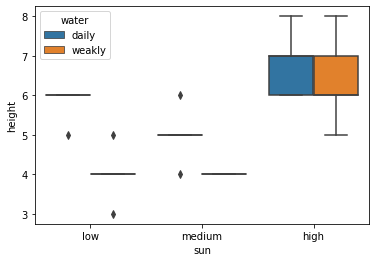

In [11]:
sns.boxplot(df['sun'],df['height'], hue=df['water'])

___oneway anova___

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA oneway
model=ols('height~sun',data=df).fit()
sm.stats.anova_lm(model,type=2)
# sun effect on plant height = significant because PR<0.05

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


___twoway ANOVA___

In [28]:
# ANOVA TwoWay
model=ols('height~ C(sun) + C(water) + C(sun) : C(water)',data=df).fit()
sm.stats.anova_lm(model,type=2)
# sun effect on plant height = significant because PR<0.05
# water effect on plant height = significant because PR<0.05
# sun+water interactive effect on plant height is not significant because PR > 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     13.45
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           2.62e-06
Time:                        17:57:45   Log-Likelihood:                -29.792
No. Observations:                  30   AIC:                             71.58
Df Residuals:                      24   BIC:                             79.99
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.8000      0.327     20.821      0.000       6.126       7.474
C(sun)[T.low]                          -1.0000      0.462     -2.165      0.041      -1.953      -0.047
C(sun)[T.medium]                       -1.8000      0.462     -3.897      0.001      -2.753      -0.847
C(water)[T.weakly]                     -0.4000      0.462     -0.866      0.395      -1.353       0.553
C(sun)[T.low]:C(water)[T.weakly]       -1.4000      0.653     -2.143      0.042      -2.748      -0.052
C(sun)[T.medium]:C(water)[T.weakly]    -0.6000      0.653     -0.919      0.367      -1.948       0.748
==============================================================================
Omnibus:                        1.012   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.297
Skew:                           0.201   Prob(JB):                        0.862
Kurtosis:                       3.275   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___tukeyHSD for 2-way ANOVA___\
link: https://www.youtube.com/watch?v=Zle_9Mz-xdc

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


In [38]:
mc = MultiComparison(df['height'], df['water'])
mcresult1=mc.tukeyhsd(0.05)
mcresult1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
daily,weakly,-1.0667,0.0213,-1.9622,-0.1712,True


In [39]:
print(mcresult1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 daily weakly  -1.0667 0.0213 -1.9622 -0.1712   True
----------------------------------------------------


In [40]:
mc = MultiComparison(df['height'], df['sun'])
mcresult2=mc.tukeyhsd(0.05)
mcresult2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.7,0.0011,-2.741,-0.659,True
high,medium,-2.1,0.0001,-3.141,-1.059,True
low,medium,-0.4,0.6124,-1.441,0.641,False


In [41]:
print(mcresult2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  high    low     -1.7 0.0011 -2.741 -0.659   True
  high medium     -2.1 0.0001 -3.141 -1.059   True
   low medium     -0.4 0.6124 -1.441  0.641  False
--------------------------------------------------


___Another waty of 2-way ANOVA y pingouin___

In [26]:
# example of one way anova
import pingouin as pg
aov = pg.anova(data=df, dv='height', between='sun', detailed=True)
print(aov)

   Source         SS  DF         MS          F     p-unc       np2
0     sun  24.866667   2  12.433333  14.105042  0.000064  0.510959
1  Within  23.800000  27   0.881481        NaN       NaN       NaN


In [22]:
# example of two way anova
import pingouin as pg
aov2 = pg.anova(data=df, dv='height', between=['sun','water'], detailed=True)
print(aov2)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


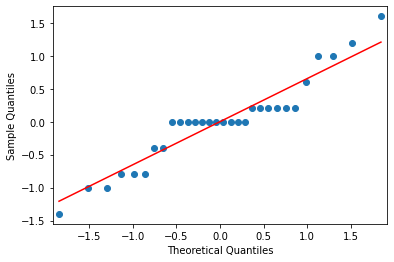

In [18]:
# qq norms plot
res = model.resid
fig =sm.qqplot(res,line='s')
plt.show()

___Assignment___
1. tukey test kaisy lagana ha 2-way anova py?✓
2. lettering and grouping kesy krni ha?
3. Annotation kaisy krni ha graphs mn?
